Alexis Alfredo Ramos Nuñez

1719797

Estadistica Aplicada

Grupo 051

In [1]:
pip install lifelines 

     |████████████████████████████████| 349 kB 18.2 MB/s 
     |████████████████████████████████| 68 kB 4.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=d1484898f2030e4d95e0738522a853989c1f65d2fdde3a3603442e2ff1a5ee7d
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import*
import warnings
warnings.filterwarnings('ignore')

In [4]:
Churn = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
Churn['TotalCharges'] = pd.to_numeric(Churn.TotalCharges, errors='coerce')

In [7]:
Churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
Churn[Churn.TotalCharges.isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [9]:
Churn[Churn["tenure"]==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [10]:
Churn=Churn.dropna(subset=['TotalCharges'])

In [11]:
Churn.drop_duplicates(inplace=True)

In [12]:
sino = ['Partner', 'Dependents', 'Churn']

for i in sino:
    Churn[i] = Churn[i].map({'Yes':1 , 'No':0})

In [13]:
Churn.describe()

,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,0.482509,0.298493,32.421786,64.798208,2283.300441,0.265785
std,0.368844,0.499729,0.457629,24.545260,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,72.000000,118.750000,8684.800000,1.000000


La variable Churn define si el cliente decide anular la suscripción. 

Sabemos que la variable Depends nos dice si el cliente tiene o no dependientes economicos, y ademas la variable Partner nos dice si el cliente tiene o no pareja.

Concluimos que el servicio  puede ser pagado por personas que por si solas puedan mantener el servicio.

In [15]:
Churn["tenure"].mean()

32.421786120591584

In [16]:
from lifelines import KaplanMeierFitter

In [17]:
kmf = KaplanMeierFitter()

,Churn
timeline,
0.0,1.000000
1.0,0.945961
2.0,0.927835
3.0,0.913725
4.0,0.901045
...,...
68.0,0.626858
69.0,0.620135
70.0,0.609657


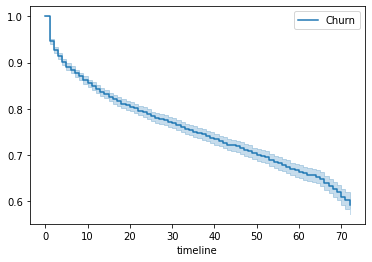

In [21]:
kmf.fit(Churn['tenure'], Churn['Churn'], label = "Churn").plot()
kmf.survival_function_

In [22]:
from lifelines.utils import median_survival_times

In [23]:
mediana = kmf.median_survival_time_

In [29]:
mediana

inf

Al ver la función de supervivencia nos damos cuenta que esta llega a los 72 meses, y han sobrevivido casi el 60%.

In [31]:
Churn["MonthlyCharges"].median()

70.35

In [32]:
arribamed = Churn[Churn['MonthlyCharges'] > 70.35]
abajomed = Churn[Churn['MonthlyCharges'] <= 70.35]

tearriba = arribamed['tenure']
charriba = arribamed['Churn']

teabajo = abajomed['tenure']
chabajo = abajomed['Churn']

In [33]:
kmf.fit(teabajo, chabajo, label = "abajomed")
kmf.survival_function_

,abajomed
timeline,
0.0,1.000000
1.0,0.934641
2.0,0.917669
3.0,0.904555
4.0,0.894942
...,...
68.0,0.752381
69.0,0.752381
70.0,0.745249


In [34]:
kmf.fit(tearriba, charriba, label = "arribamed")
kmf.survival_function_

,arribamed
timeline,
0.0,1.000000
1.0,0.957301
2.0,0.938069
3.0,0.923023
4.0,0.907532
...,...
68.0,0.556350
69.0,0.547359
70.0,0.536163


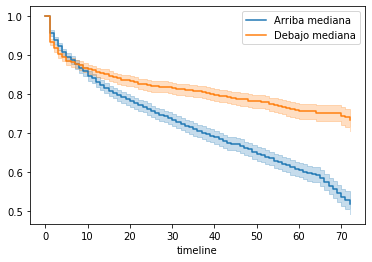

In [36]:
ax = plt.subplot(111)
ax = kmf.fit(tearriba, charriba, label = "Arriba mediana").plot(ax=ax)
ax = kmf.fit(teabajo, chabajo, label = "Debajo mediana").plot(ax=ax)

Al analizar los datos y la grafica vemos que a los 72 meses quienes pagan sobre la mediana diremos que es aproximadamente un 50% de los clientes, mientras que los que pagan por debajo de la mediana son aproximadamente el 73% de los clientes.

In [37]:
from lifelines.statistics import logrank_test

Hipótesis:

H0: Los que pagan debajo de la mediana = los que pagan sobre la mediana


In [38]:
results = logrank_test(tearriba, teabajo, event_observed_A = charriba, event_observed_B = chabajo)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          91.85 <0.005     69.86

Como el p-valor < 0.05 entonces rechazamos la H0, entonces decimos que las funciones de supervivencia no son iguales y que los datos observados son correctos.

In [39]:
dls = Churn[Churn['InternetService'] == "DSL"]
fo = Churn[Churn['InternetService'] == "Fiber optic"]
no = Churn[Churn['InternetService'] == "No"]
tdls = dls['tenure']
cdls = dls['Churn']
tfo = fo['tenure']
cfo = fo['Churn']
tno = no['tenure']
cno = no['Churn']

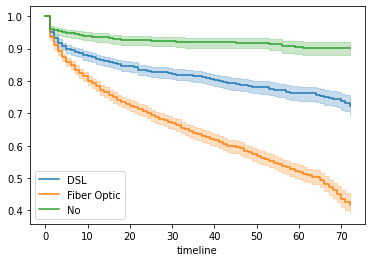

In [40]:
ax = plt.subplot(111)
ax = kmf.fit(tdls, cdls, label = "DSL").plot(ax=ax)
ax = kmf.fit(tfo, cfo, label = "Fiber Optic").plot(ax=ax)
ax = kmf.fit(tno, cno, label = "No").plot(ax=ax)

Al observar el gráfico nos podemos dar cuenta que el internet afecta el hecho de que los clientes abandonen la empresa ya que el cargo mensual incrementa.
Al ver el grafico podemos concluir que:
Los que No tienen internet se inclinan mas por no dejar la empresa.
Los que tienen DLS tienen un mayor pago.
Y los que tiene fibra ooptica tiene un cargo mensual mas elevado, y esto hace que sean quienes mas abandonan la empresa.

In [42]:
categoricas = ['gender','PhoneService','MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling', 'PaymentMethod']
for i in categoricas:
    Churn[i] = Churn[i].astype('category')
    Churn[i] = Churn[i].cat.codes

In [43]:
from lifelines import CoxPHFitter

In [44]:
cph = CoxPHFitter()

In [46]:
Churn.drop('customerID', inplace=True, axis=1)

In [47]:
cph.fit(Churn, duration_col='tenure', event_col='Churn')

<lifelines.CoxPHFitter: fitted with 7032 total observations, 5163 right-censored observations>

In [48]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7032 total observations, 5163 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7032
number of events observed = 1869
   partial log-likelihood = -12679.32
         time fit was run = 2022-05-19 00:36:00 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                
gender            -0.04       0.96       0.05            -0.13             0.05                 0.88                 1.05
SeniorCitizen      0.04       1.04       0.06            -0.07             0.15                 0.93                 1.16
Partner           -0.18       0.84       0.05            -0.28            -0.07                 0.75                 0.93
Dependents        -0.09       0.91       0.07            -0.23             0.04                 0.80                 1.04
PhoneService      -0.21       0.81       0.12            -0.44             0.02                 0.64                 1.02
MultipleLines     -0.08       0.92       0.03            -0.13            -0.03                 0.88                 0.97
InternetService   -0.20       0.82       0.06            -0.31            -0.08                 0.73                 0.92
OnlineSecurity    -0.22       0.80       0.03            -0.29            -0.16                 0.75                 0.85
OnlineBackup      -0.15       0.86       0.03            -0.20            -0.09                 0.82                 0.91
DeviceProtection  -0.07       0.93       0.03            -0.13            -0.02                 0.88                 0.98
TechSupport       -0.16       0.85       0.03            -0.23            -0.10                 0.80                 0.91
StreamingTV       -0.09       0.91       0.03            -0.15            -0.04                 0.86                 0.96
StreamingMovies   -0.09       0.91       0.03            -0.15            -0.04                 0.86                 0.96
Contract          -1.63       0.20       0.08            -1.79            -1.47                 0.17                 0.23
PaperlessBilling   0.15       1.17       0.06             0.04             0.26                 1.04                 1.30
PaymentMethod      0.20       1.22       0.03             0.15             0.25                 1.16                 1.29
MonthlyCharges     0.06       1.06       0.00             0.06             0.07                 1.06                 1.07
TotalCharges      -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00

                   cmp to      z      p   -log2(p)
covariate                                         
gender               0.00  -0.91   0.36       1.46
SeniorCitizen        0.00   0.69   0.49       1.02
Partner              0.00  -3.20 <0.005       9.48
Dependents           0.00  -1.33   0.18       2.45
PhoneService         0.00  -1.81   0.07       3.84
MultipleLines        0.00  -2.97 <0.005       8.37
InternetService      0.00  -3.39 <0.005      10.46
OnlineSecurity       0.00  -6.69 <0.005      35.40
OnlineBackup         0.00  -5.45 <0.005      24.24
DeviceProtection     0.00  -2.72   0.01       7.25
TechSupport          0.00  -5.02 <0.005      20.90
StreamingTV          0.00  -3.29 <0.005       9.98
StreamingMovies      0.00  -3.25 <0.005       9.77
Contract             0.00 -19.77 <0.005     286.45
PaperlessBilling     0.00   2.72   0.01       7.27
PaymentMethod        0.00   7.31 <0.005      41.71
MonthlyCharges       0.00  27.12 <0.005     535.51
TotalCharges         0.00 -38.96 <0.005        inf
---
Concordance = 0.93
Partial AIC = 25394.64
log-likelihood ratio test = 5947.44 on 18 df
-log2(p) of ll-ratio test = inf

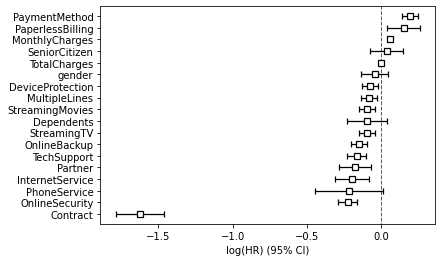

In [49]:
cph.plot()

Con respecto a nuestra tabla vamos a ver las variables que sí afectan el riesgo de sufrir el evento por su p-valor < alpha:

Partner: Tener pareja reduce el riesgo en un 16%

MultipleLines: El tener más de una línea telefónica reduce el riesgo 8%

InternetService: El tener servicio de internet reduce el riesgo en 18%

Online Security: El tener seguridad en línea reduce el riesgo en 20%

OnlineBackup: El tener respaldo de información en la nube reduce el riesgo 14%

DeviceProtection: El tener protección para el dispositivo reduce el riesgo en 7%

Tech Support: El tener soporte técnico reduce el riesgo en 15%

StreamingTV: El tener servicio de televisión en streaming reduce el riesgo en 9%

StreamingMovies: El tener servicio de películas en streaming reduce el riesgo en 9%

Contract: El tener contrato reduce el riesgo en 80%

PaperlessBilling: El recibir la factura por mail aumenta el riesgo en 17%

PaymentMethod: El método de pago aumenta el riesgo en 22%

MonthlyCharges: El monto cargado por mes aumenta el riesgo en 6%

TotalCharges: y con un p-valor menor a alpha no aumenta ni reduce el riesgo porque tiene un valor de 0%

Las principales estrategias que se pudieran implementar para que la empresa conservarav a sus clientes deberian de estar enfocadas principalmente en el metodo de pago, las facturas por mail y en el monto cargado por mes ya que estos factores son los que mas aumentan el riesgo de abandono por parte de los clientes.
Implemenatr diferentes metodos de pagos para que los clientes puedan tener mayor facilidad en este punto, asi mismo se pudieran implementar promociones dentro de los paquetes que se presentan para poder conservar a los clientes y buscar nuevos clientes potenciales.